# View Calspec SED 

- Author Sylvie Dagoret-Campagne
- Creation : 25 september 2019
- Update : October 7th 2019
- Update : April 20th 2020 for package PhotomCorrectAuxTel

In [17]:
import os
import numpy as np

In [18]:
from astropy.table import Table
from astropy.io import fits

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [20]:
import pysynphot as S

In [21]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')

In [22]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(24,18)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

# Read the Table

In [23]:
t=Table.read('table_summary_allcalspec.fits')
#t=Table.read('table_summary_calspec_hd.fits')  # view only HD type stars

In [24]:
print(t)

 OBJNAME      RA   ...            magI                      FILES           
---------- ------- ... ------------------------- ---------------------------
     10LAC 339.815 ...                     5.190         10lac_stis_004.fits
 ALPHA_LYR 279.235 ...                     0.100     alpha_lyr_stis_008.fits
 BD11D3759 218.570 ...                     8.473     bd11d3759_stis_002.fits
  FEIGE110 349.993 ...                    12.145   feige110_stisnic_006.fits
   FEIGE34 159.903 ...                    11.464       feige34_stis_004.fits
   FEIGE66 189.348 ...                    10.809            feige66_002.fits
   FEIGE67 190.466 ...                    12.159            feige67_002.fits
   G191B2B  76.378 ...                    12.108    g191b2b_stisnic_006.fits
    G93-48 328.106 ...                    12.938             g93_48_004.fits
     GD108 150.197 ...                    13.781              gd108_005.fits
       ...     ... ...                       ...                         ...

In [25]:
NBFILES=len(t)

In [26]:
# A flag to turn off plotting calspec
# In some cases the flag VISIBILITY may correspond to a flag saying if the star is visible
FLAG_VISIBILITY= [True] * len(t)

In [27]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBFILES), alpha=1)

# Flux in linear scale

Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 6265 bins contained negative fluxes; they have been set to zero.
Warning, 22 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 7208 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 6264 bins contained negative fluxes; they have been set to zero.
Warning, 44 of 7210 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 6706 bins contained negative fluxes; they have been set to zero.
Warning, 53 of 7209 bins contained negative fluxes; they have been set to zero.
Warning, 16 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 6264 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 13 of 6263 bins contained negative

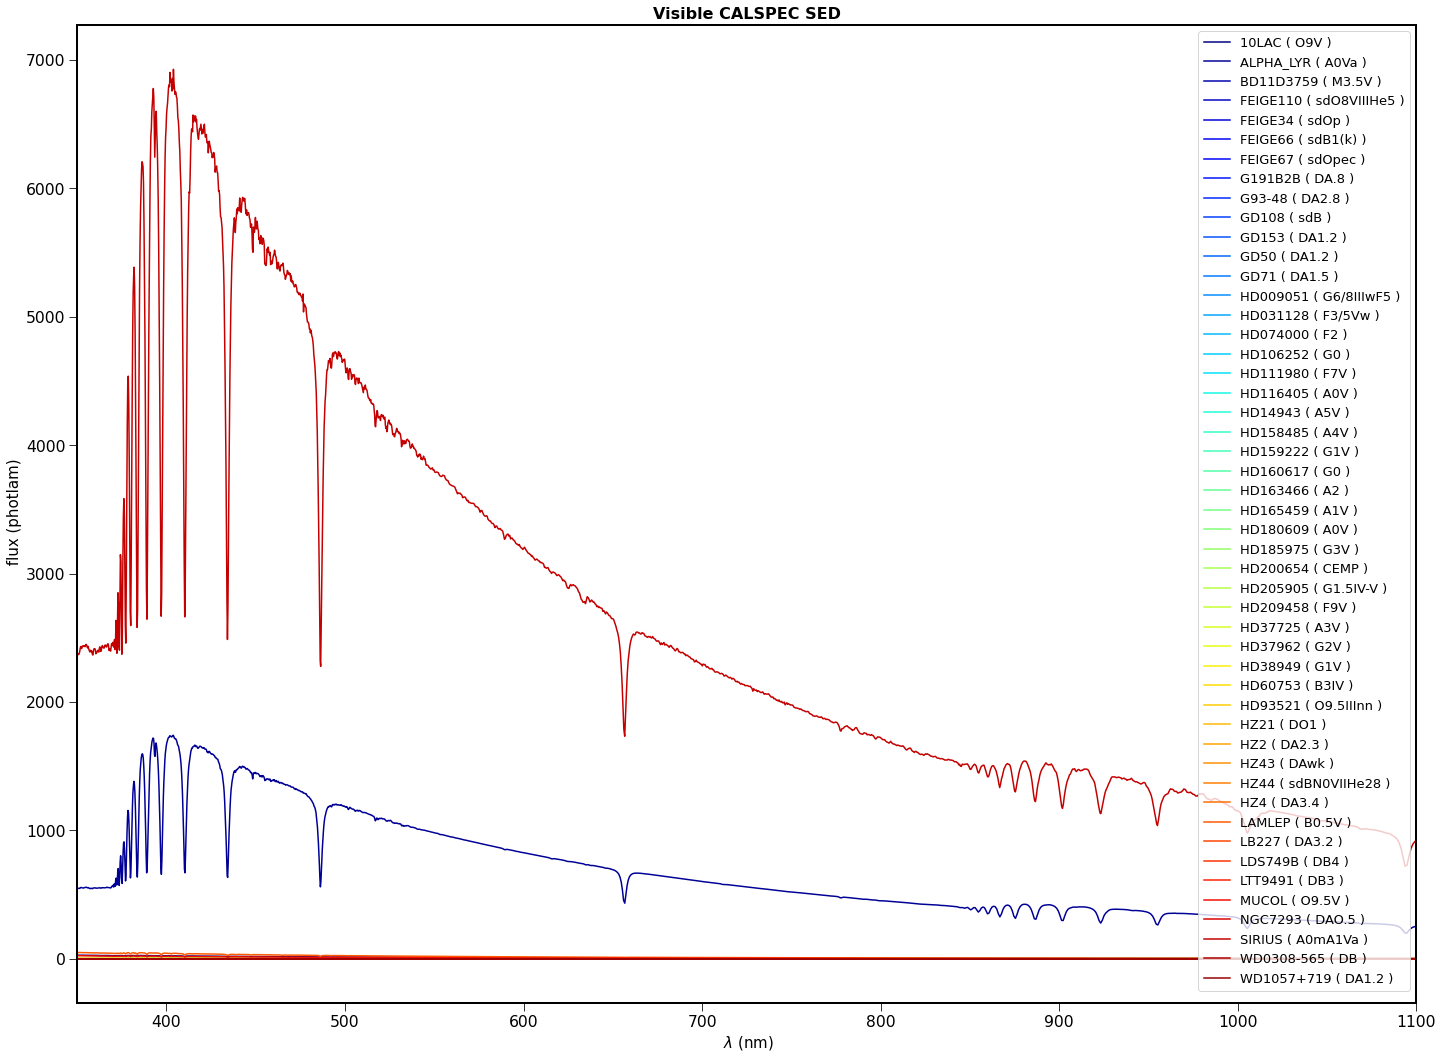

In [28]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')    
        
        label=t["OBJNAME"][idx]+" ( "+t["SP_TYPE"][idx]+" )"
        plt.plot(spec.wave, spec.flux,color=all_colors[idx],label=label)
        
    idx+=1
    
plt.xlim(350.,1100.)
#plt.ylim(0.,1.)
plt.legend()
plt.grid()

fign="all_viscalspec_spectra_lin.pdf"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' flux ({})'.format(spec.fluxunits.name)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Visible CALSPEC SED")
plt.grid(color="k")
plt.savefig(fign)

# Show relative flux renormalised to flux at 500 nm in linear scale

Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 6265 bins contained negative fluxes; they have been set to zero.
Warning, 22 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 7208 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 6264 bins contained negative fluxes; they have been set to zero.
Warning, 44 of 7210 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 6706 bins contained negative fluxes; they have been set to zero.
Warning, 53 of 7209 bins contained negative fluxes; they have been set to zero.
Warning, 16 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 6264 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 13 of 6263 bins contained negative

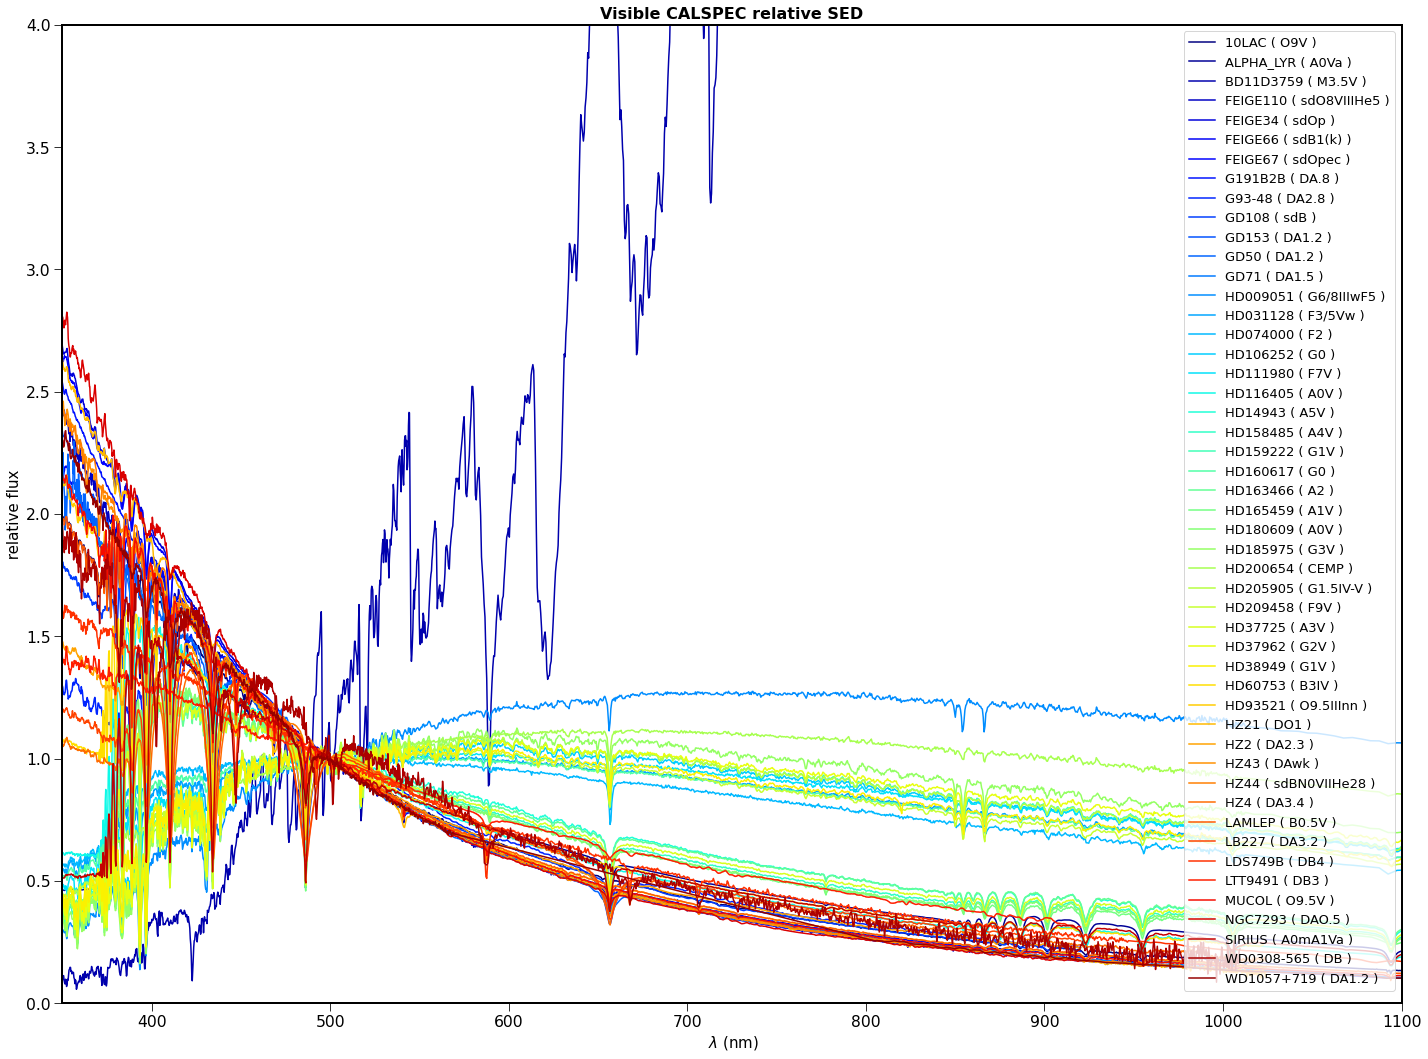

In [29]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')    
        
        # wavelength bin at 500 nm
        #-----------------------------
        wl_idx=np.argmin(np.abs(spec.wave-500))
        
        label=t["OBJNAME"][idx]+" ( "+t["SP_TYPE"][idx]+" )"
        
        plt.plot(spec.wave, spec.flux/spec.flux[wl_idx],color=all_colors[idx],label=label)
        
    idx+=1
    
plt.xlim(350.,1100.)
plt.ylim(0.,4.)
plt.legend()
plt.grid()

fign="all_viscalspec_relspectra_lin.pdf"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' relative flux '
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Visible CALSPEC relative SED")
plt.grid(color="k")
plt.savefig(fign)

In [30]:
np.argmin(np.abs(spec.wave-500))

2523

In [31]:
spec.wave[2161]

400.5562012

# Flux in log scale

Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 6265 bins contained negative fluxes; they have been set to zero.
Warning, 22 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 7208 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 6264 bins contained negative fluxes; they have been set to zero.
Warning, 44 of 7210 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 6706 bins contained negative fluxes; they have been set to zero.
Warning, 53 of 7209 bins contained negative fluxes; they have been set to zero.
Warning, 16 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 6264 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 13 of 6263 bins contained negative

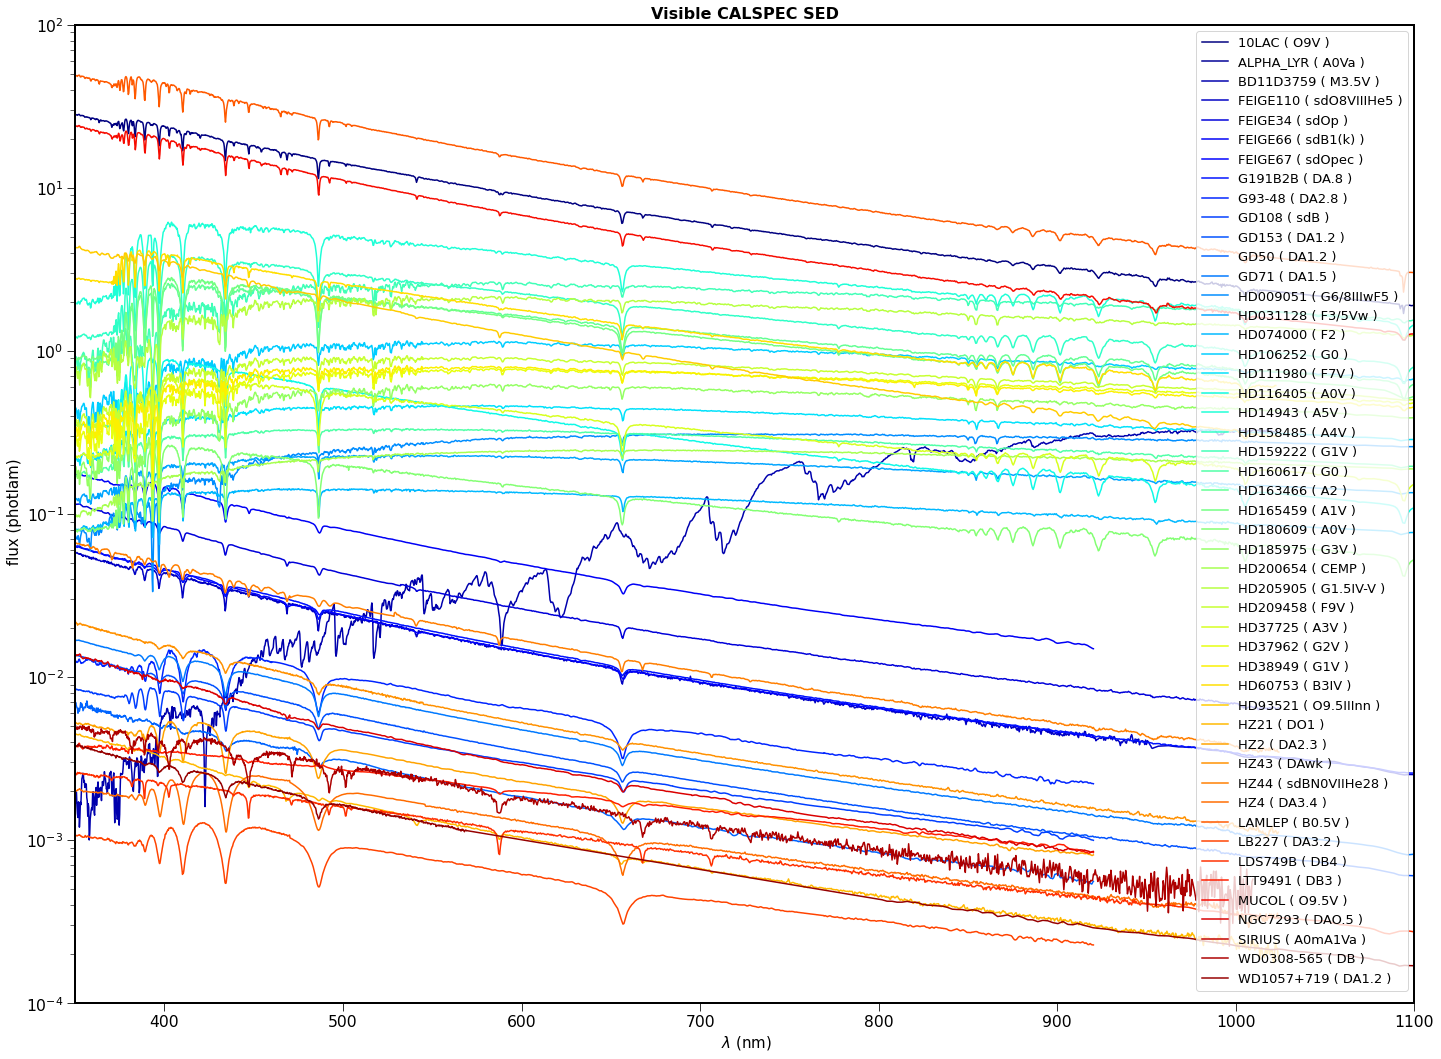

In [32]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')    
        
        label=t["OBJNAME"][idx]+" ( "+t["SP_TYPE"][idx]+" )"
            
        plt.semilogy(spec.wave, spec.flux,color=all_colors[idx],label=label)
        
    idx+=1
    
plt.xlim(350.,1100.)
plt.ylim(.0001,100.)
#plt.ylim(0.,1.)
plt.legend()
plt.grid()

fign="all_viscalspec_spectra_log.pdf"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' flux ({})'.format(spec.fluxunits.name)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Visible CALSPEC SED")
plt.grid(color="k")
plt.savefig(fign)